# Introduction

# Popular Data Science Questions
Goal of this project is to determine Popular Data Science questions. For the reasearch I will be using  [Data Science Stack Exchange](https://datascience.stackexchange.com/).

Data Science stack Exchange is a website where anybody can ask and answer questions about the data science field. The best answers are voted up and rise to the top. Users can earn reputations, badges, and privelegs for actions that they perform on the site. They also have a "Jobs" link for people looking for employment. Overall it's a very good website to learn and ask questions and will be perfect for the goal of this analysis.

Stack Exchange provides a public data base for each of it's websites. Here's a [link](https://data.stackexchange.com/datascience/query/new) to Data Science Stack Exchange's Database. It saves time from scraping the website for information, data can be queried and downloaded as a csv file.

Upon more research the table Posts looks useful 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

questions = pd.read_csv('2019_questions.csv')
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


# Exploring the Data

In [2]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [3]:
questions['FavoriteCount'].value_counts(dropna=False)

NaN     7432
1.0      953
2.0      205
0.0      175
3.0       43
4.0       12
5.0        8
6.0        4
7.0        4
11.0       1
8.0        1
16.0       1
Name: FavoriteCount, dtype: int64

`FavoriteCount` is the only column in the data set missing values (7432). Dropping rows where `FavoriteCount` is missing wouldn't be a good idea since over 80% the data set would be gone. One possible solution is to fill the missing values with 0.

The types of most columns are adequate, but `CreationDate` can be converted to datetime and `FavoriCount` to `int`.

The `Tags` column can be cleaned up to be more readable.

# Data Cleaning

In [4]:
# filling in missing values
questions['FavoriteCount'] = questions['FavoriteCount'].fillna(0)
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  8839 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [5]:
# Set column types
questions['CreationDate'] = pd.to_datetime(questions['CreationDate'])
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount           float64
dtype: object

In [6]:
# cleaning Tags column
questions['Tags'] = questions['Tags'].str.replace('^<|>$', '').str.split('><')
questions.sample(5)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
7918,44006,2019-01-15 01:59:01,0,291,"[keras, scikit-learn, tensorflow]",0,0.0
5889,63437,2019-11-20 04:48:26,0,59,"[machine-learning, dataset, data-cleaning, mac...",2,1.0
5726,51928,2019-05-14 07:29:24,1,34,[data-analysis],1,0.0
2377,58494,2019-09-01 07:35:22,1,14,"[sampling, variance]",0,2.0
4340,49688,2019-04-21 18:05:23,1,129,"[machine-learning, python, time-series, regres...",0,0.0


# Most Used and Viewed Tags

In [7]:
# dictionary of tag counts
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [8]:
# convert tag_count to DataFrame
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

,Count
machine-learning,2693
data-mining,217
regression,347
linear-regression,175
regularization,50
python,1814
time-series,466
forecast,34
forecasting,85
scikit-learn,540


In [9]:
most_used = tag_count.sort_values(by='Count').tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


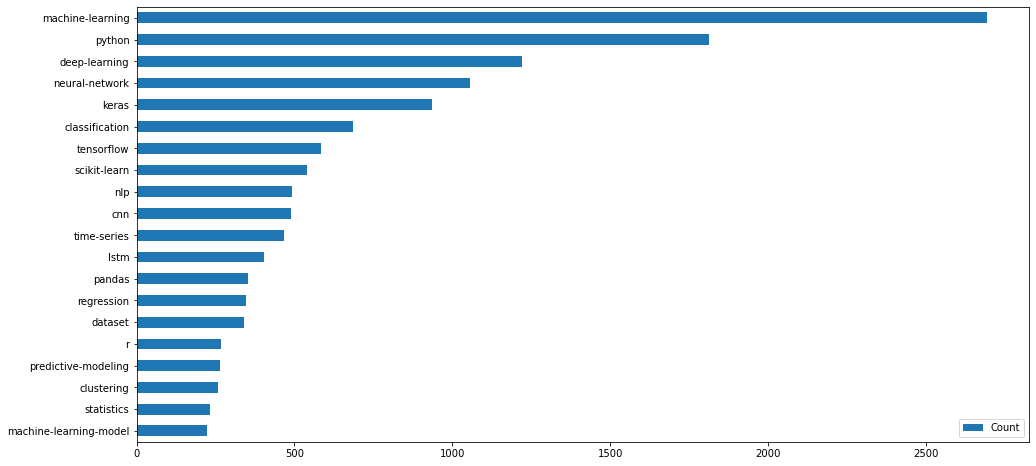

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

most_used.plot(kind='barh', figsize=(16,8)).legend(loc='lower right')
plt.show()

In [11]:
tag_views_count = {}

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_views_count:
            tag_views_count[tag] += row['ViewCount']
        else:
            tag_views_count[tag] = row['ViewCount'] 
            
tag_views_count = pd.DataFrame.from_dict(tag_views_count, orient='index')
tag_views_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_views_count.sort_values(by='ViewCount').tail(20)
most_viewed

,ViewCount
clustering,33928
csv,38654
pytorch,40240
dataset,43151
regression,49451
numpy,49767
time-series,64134
cnn,70349
nlp,71382
lstm,74458


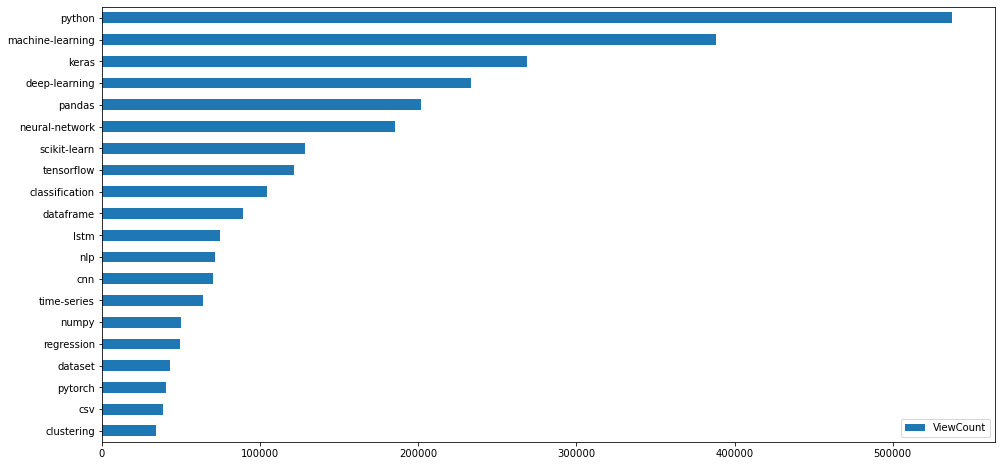

In [12]:
most_viewed.plot(kind='barh',figsize=(16,8))
plt.show()

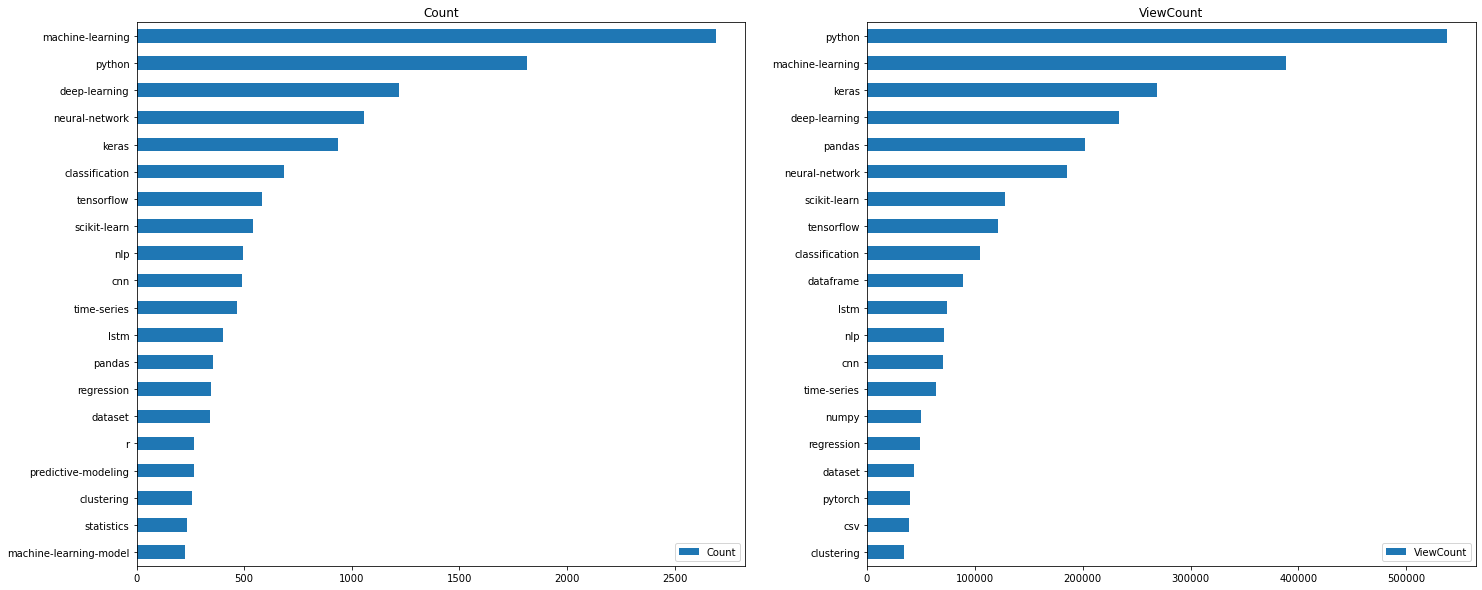

In [13]:
# side by side comparison
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

plt.show()

# Relations Between Tags
One way to determine how tags are related to each other, is to count how many times they appear together.

In [14]:
# List of all tags
all_tags = list(tag_count.index)

In [15]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[:5,:5]

,machine-learning,data-mining,regression,linear-regression,regularization
machine-learning,NaN,NaN,NaN,NaN,NaN
data-mining,NaN,NaN,NaN,NaN,NaN
regression,NaN,NaN,NaN,NaN,NaN
linear-regression,NaN,NaN,NaN,NaN,NaN
regularization,NaN,NaN,NaN,NaN,NaN


The dataframe will now be filled with zeroes and then, for each lists of tags in questions["Tags"], intervening tags will be incremented by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [16]:
associations.fillna(0, inplace=True)

for tags in questions['Tags']:
    associations.loc[tags,tags] += 1

The dataframe is quite large, so the focus will be put on the most used tags. (Use JupyterLabs to display color)

In [17]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


The cells highlighted in yellow show that 'r' and 'time-series' were used together 22 times. Now it's confirmed that machine-learning was used 2693 times.

It's difficult to understand what is going on in this dataframe. Usage of a heatmap would make it easier to understand. Values in blue will be removed so the colors won't get skewed.

In [18]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

<ipython-input-18-2d3c201ff994>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  relations_most_used.iloc[i,i] = pd.np.NaN


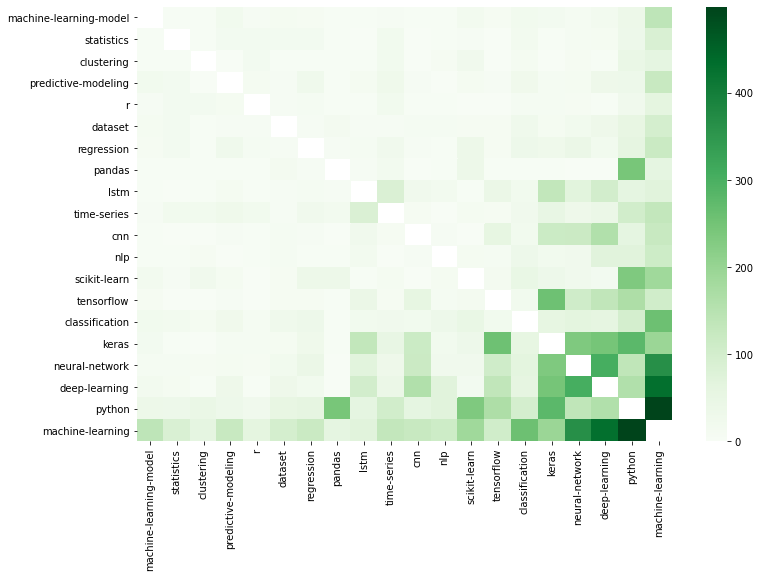

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)
plt.show()

The most used tags seems to have the strongest relationships, looking at the dark concentration in the bottom right corner. This could be because these tags are used a lot, so they end up being used together without having any strong relation between them.

# Domain Knowledge

Most used tags are also the most viewed. Top 10 tags of each include python, machine-learning, deep-learning, neural-network, keras, tensorflow, classification and scikit-learn.

Keras, Tensorflow, and scikit-learn are python libraries to apply deep-learning (a type of neural-network).

Most of the top tags are closely related with one central machine-learning theme, and that is deep-learning.

From this analysis, someone with sufficient domain knowledge can see that the most popular topic (2019) is deep-learning.

# Just a Fad?

Data set `all_questions.csv'` has all the questions ever asked on Data Science Stack Exchange, their dates and tags.

Steps to track interest in deep learning
- Count how many deep learning questions are asked per time period.
- The total amount of questions per time period.
- How many deep learning questions there are relative to the total amount of questions per time period.

In [20]:
all_questions = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])

In [21]:
# transform Tags column
all_questions['Tags'] = all_questions['Tags'].str.replace('^<|>$', '').str.split('><')
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


The amount of deep-learning questions asked will be tracked quarterly. Below a function `is_deeplearning` that marks 1 if it's deep learning related and 0 otherwise.

In [22]:
# deep-learning related tags
dl_tags = ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]

def is_deeplearning(tags):
    for tag in tags:
        if tag in dl_tags:
            return 1
    return 0

all_questions['DeepLearning'] = all_questions['Tags'].apply(is_deeplearning)

In [23]:
all_questions.sample(5)

,Id,CreationDate,Tags,DeepLearning
14476,62617,2019-11-03 20:59:44,"[forecasting, time]",0
4698,39117,2018-10-03 15:06:58,"[python, deep-learning, keras, tensorflow]",1
20816,14314,2016-10-02 13:13:15,"[recommender-system, information-retrieval, ev...",0
13986,30919,2018-04-27 04:42:14,[gradient-descent],0
16046,53272,2019-06-05 18:07:48,"[prediction, bert]",0


In [24]:
# function to get quarter
def get_quarter(date):
    year = str(date.year)[-2:]
    quarter = str(((date.month-1) // 3) + 1)
    return '{y}Q{q}'.format(y=year, q=quarter)

all_questions['Quarter'] = all_questions['CreationDate'].apply(get_quarter)
all_questions.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


In [25]:
# group by quarter
quarterly = all_questions.groupby('Quarter').agg({'DeepLearning': ['sum','size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly['DeepLearningRate'] = quarterly['DeepLearningQuestions'] / quarterly['TotalQuestions']

quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
7,16Q1,110,516,0.213178
8,16Q2,109,518,0.210425
6,15Q4,66,382,0.172775
16,18Q2,566,1448,0.390884
2,14Q4,21,216,0.097222


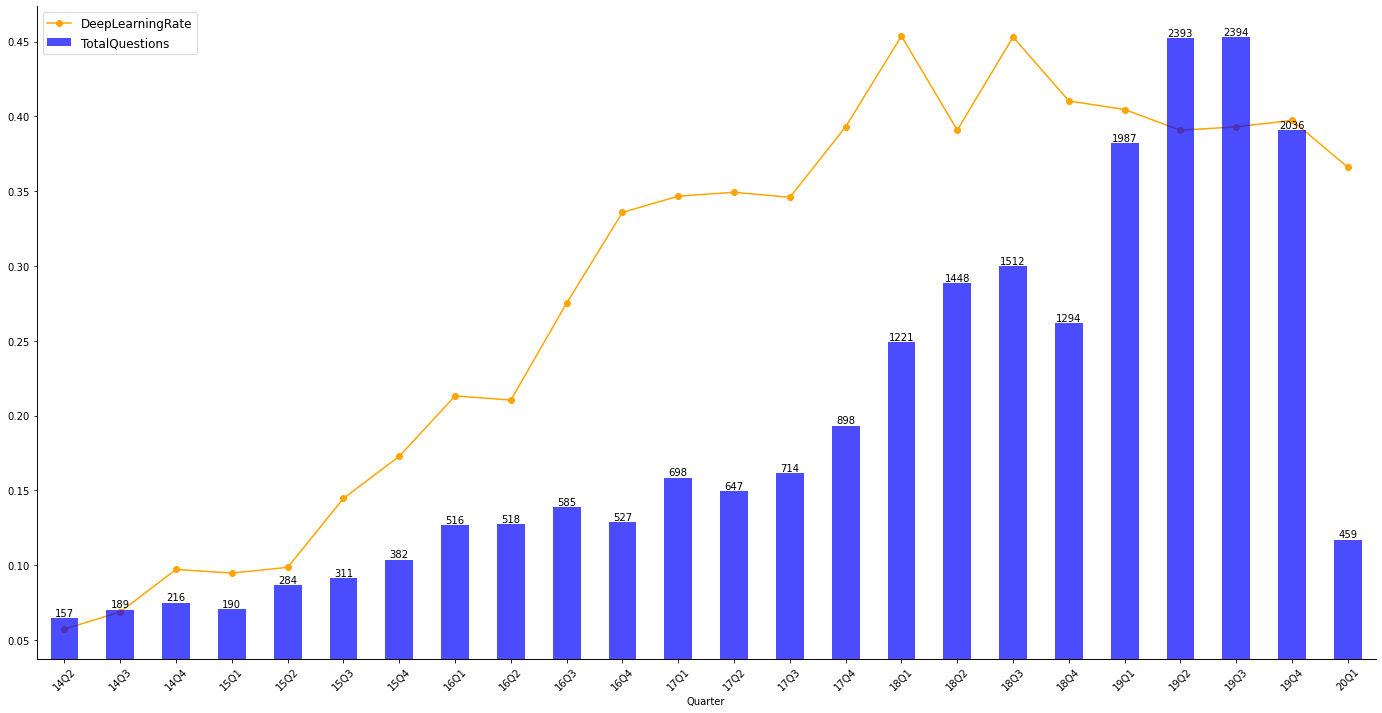

In [26]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, color="blue", alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

# Conclusion
Since the creation of Data Science Stack Exchange, questions related to deep-learning saw a high-growth trend and started to plateau. There is no evidence to show that questions relating to deep-learning is decreasing.